# 📓 Telco Customer Churn Prediction - Complete Project Notebook

In [3]:
# =============================================================================
# INITIAL SETUP & IMPORTS
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Additional imports
from imblearn.over_sampling import SMOTE
import joblib
import scipy.stats as stats

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 🎯 PHASE 1: BUSINESS UNDERSTANDING

In [4]:
# =============================================================================
# PHASE 1: BUSINESS UNDERSTANDING
# =============================================================================
"""
BUSINESS CONTEXT:
We're data scientists at a telecommunications company facing customer churn issues.

BUSINESS PROBLEM:
- Customers are leaving for competitors
- High customer acquisition costs make retention crucial
- Need to identify at-risk customers proactively

BUSINESS OBJECTIVES:
1. Identify customers likely to churn in the next month
2. Understand key factors driving churn decisions
3. Enable targeted retention campaigns

SUCCESS METRICS:
- Recall: Catch as many potential churners as possible
- Precision: Avoid wasting resources on false positives
- Business Impact: Reduce churn rate by 15% in 6 months

STAKEHOLDERS:
- Marketing Team: Run retention campaigns
- Customer Service: Proactive outreach
- Executive Team: Strategic decisions
"""
print("🎯 Business Understanding: Define churn prediction for customer retention")

🎯 Business Understanding: Define churn prediction for customer retention


## 📊 PHASE 2: DATA UNDERSTANDING

📊 PHASE 2: DATA UNDERSTANDING
DATASET OVERVIEW
Dataset Shape: (7043, 21)
Number of customers: 7043
Number of features: 20

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

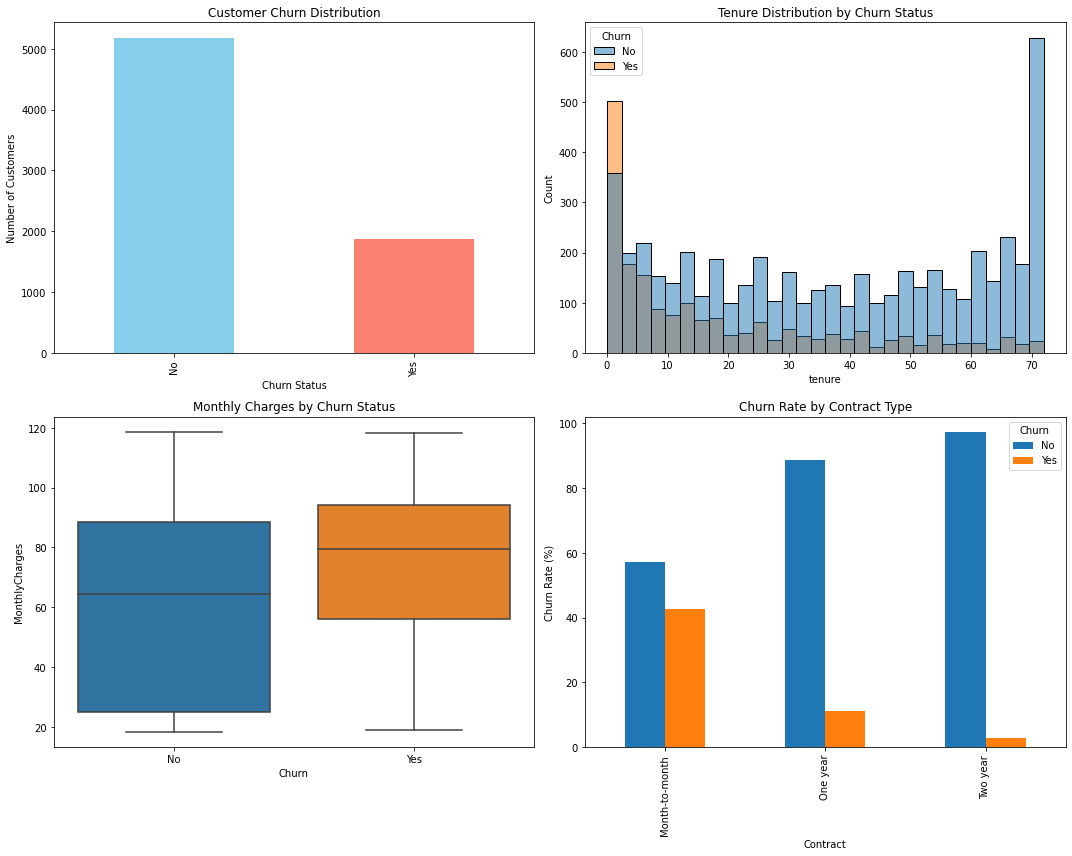

✅ Data Understanding Phase Complete!


In [5]:
# =============================================================================
# PHASE 2: DATA UNDERSTANDING
# =============================================================================
print("📊 PHASE 2: DATA UNDERSTANDING")

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2.1 Initial Data Exploration
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of customers: {len(df)}")
print(f"Number of features: {df.shape[1] - 1}")  # excluding target

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

# 2.2 Check for missing values
print("\n" + "=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info[missing_info['Missing Count'] > 0])

# 2.3 Check the target variable distribution
print("\n" + "=" * 50)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 50)
churn_distribution = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
for status, count, percentage in zip(churn_distribution.index, churn_distribution.values, churn_percentage.values):
    print(f"  {status}: {count} customers ({percentage:.1f}%)")

# 2.4 Basic statistical summary
print("\n" + "=" * 50)
print("NUMERICAL FEATURES SUMMARY")
print("=" * 50)
numerical_summary = df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()
print(numerical_summary)

# 2.5 Data Quality Issues Check
print("\n" + "=" * 50)
print("DATA QUALITY CHECK")
print("=" * 50)

# Check TotalCharges data type issue (common in this dataset)
print("TotalCharges data type:", type(df['TotalCharges'].iloc[0]))
print("Sample TotalCharges values:", df['TotalCharges'].iloc[:5].values)

# Check for empty strings in TotalCharges
empty_charges = df['TotalCharges'].eq(' ').sum()
print(f"Empty strings in TotalCharges: {empty_charges}")

# 2.6 Initial Visualizations
print("\n" + "=" * 50)
print("INITIAL DATA VISUALIZATIONS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Churn distribution
churn_distribution.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'salmon'])
axes[0,0].set_title('Customer Churn Distribution')
axes[0,0].set_xlabel('Churn Status')
axes[0,0].set_ylabel('Number of Customers')

# Tenure distribution by churn
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, ax=axes[0,1])
axes[0,1].set_title('Tenure Distribution by Churn Status')

# Monthly charges by churn
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1,0])
axes[1,0].set_title('Monthly Charges by Churn Status')

# Contract type vs churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Churn Rate by Contract Type')
axes[1,1].set_ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()

print("✅ Data Understanding Phase Complete!")

## 🧹 PHASE 3: DATA PREPARATION

In [7]:
# =============================================================================
# PHASE 3: DATA PREPARATION
# =============================================================================
print("🧹 PHASE 3: DATA PREPARATION")

# Create a copy for preprocessing
df_clean = df.copy()

# 3.1 Handle Missing Values and Data Type Issues
print("=" * 50)
print("DATA CLEANING")
print("=" * 50)

# Fix TotalCharges - convert to numeric and handle empty strings
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Check how many missing values we have now
missing_after_conversion = df_clean['TotalCharges'].isnull().sum()
print(f"Missing values in TotalCharges after conversion: {missing_after_conversion}")

# Fill missing TotalCharges with 0 (new customers)
df_clean['TotalCharges'].fillna(0, inplace=True)
print(f"Missing values after filling: {df_clean['TotalCharges'].isnull().sum()}")

# 3.2 Feature Engineering
print("\n" + "=" * 50)
print("FEATURE ENGINEERING")
print("=" * 50)

# Create new features based on domain knowledge
def create_new_features(df):
    """Create meaningful features for churn prediction"""
    
    # Customer tenure groups
    df['TenureGroup'] = pd.cut(df['tenure'], 
                              bins=[0, 12, 24, 48, 100], 
                              labels=['New', 'Regular', 'Established', 'Veteran'])
    
    # Average monthly charge (more accurate than current MonthlyCharges)
    # FIXED: Handle infinite values and missing values properly
    df['AvgMonthlyCharge'] = df['TotalCharges'] / (df['tenure'] + 1)  # +1 to avoid division by zero
    
    # Replace infinite values with NaN first, then fill with MonthlyCharges
    df['AvgMonthlyCharge'] = df['AvgMonthlyCharge'].replace([np.inf, -np.inf], np.nan)
    
    # Fill NaN values with the corresponding MonthlyCharges
    mask = df['AvgMonthlyCharge'].isna()
    df.loc[mask, 'AvgMonthlyCharge'] = df.loc[mask, 'MonthlyCharges']
    
    # Charge to tenure ratio (identify potentially unhappy customers)
    df['ChargeToTenureRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)
    
    # Total services used
    service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    
    # Count services (will encode these properly first)
    df['TotalServices'] = 0
    for col in service_columns:
        if col in df.columns:
            # Convert to binary (1 for Yes, 0 for No/No service)
            service_binary = df[col].apply(lambda x: 1 if x == 'Yes' else 0)
            df['TotalServices'] += service_binary
    
    # Internet service flags
    df['HasInternetService'] = df['InternetService'].apply(lambda x: 0 if x == 'No' else 1)
    df['HasFiberOptic'] = df['InternetService'].apply(lambda x: 1 if x == 'Fiber optic' else 0)
    
    return df

df_clean = create_new_features(df_clean)
print("New features created: TenureGroup, AvgMonthlyCharge, ChargeToTenureRatio, TotalServices, HasInternetService, HasFiberOptic")

# Verify the new features
print("\nNew features summary:")
print(f"AvgMonthlyCharge - Min: {df_clean['AvgMonthlyCharge'].min():.2f}, Max: {df_clean['AvgMonthlyCharge'].max():.2f}")
print(f"TotalServices - Min: {df_clean['TotalServices'].min()}, Max: {df_clean['TotalServices'].max()}")
print(f"TenureGroup distribution:\n{df_clean['TenureGroup'].value_counts()}")

# 3.3 Encode Categorical Variables
print("\n" + "=" * 50)
print("CATEGORICAL VARIABLE ENCODING")
print("=" * 50)

# First, handle binary categorical variables
binary_mappings = {
    'gender': {'Female': 0, 'Male': 1},
    'Partner': {'No': 0, 'Yes': 1},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'PaperlessBilling': {'No': 0, 'Yes': 1},
    'Churn': {'No': 0, 'Yes': 1}  # Target variable
}

print("Encoding binary variables...")
for col, mapping in binary_mappings.items():
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].map(mapping)
        print(f"  ✓ Encoded {col}")

# Handle service columns with multiple categories
service_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

print("\nEncoding service variables...")
for col in service_columns:
    if col in df_clean.columns:
        # Create a mapping that handles all possible values
        unique_vals = df_clean[col].unique()
        mapping = {val: 1 if val == 'Yes' else 0 for val in unique_vals}
        df_clean[col] = df_clean[col].map(mapping)
        print(f"  ✓ Encoded {col}: unique values → {unique_vals}")

# One-hot encode remaining categorical variables
multi_category_cols = ['InternetService', 'Contract', 'PaymentMethod', 'TenureGroup']

print(f"\nOne-hot encoding: {multi_category_cols}")
df_encoded = pd.get_dummies(df_clean, columns=multi_category_cols, prefix=multi_category_cols, drop_first=True)

print(f"Shape before encoding: {df_clean.shape}")
print(f"Shape after encoding: {df_encoded.shape}")

# 3.4 Handle Class Imbalance
print("\n" + "=" * 50)
print("CLASS IMBALANCE HANDLING")
print("=" * 50)

churn_counts = df_encoded['Churn'].value_counts()
print("Current class distribution:")
print(churn_counts)
print(f"Churn rate: {churn_counts[1] / len(df_encoded):.2%}")

print("Note: We'll use SMOTE during the modeling phase to handle imbalance")

# 3.5 Prepare Features and Target
print("\n" + "=" * 50)
print("FINAL DATA PREPARATION")
print("=" * 50)

# Remove customerID and prepare features/target
X = df_encoded.drop(['customerID', 'Churn'], axis=1, errors='ignore')
y = df_encoded['Churn']

print(f"Final feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Number of features: {len(X.columns)}")

# Display feature names
print("\nFirst 10 features:")
print(X.columns[:10].tolist())

# 3.6 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain-Test Split Results:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training churn rate: {y_train.mean():.2%}")
print(f"Test churn rate: {y_test.mean():.2%}")

# 3.7 Data Validation
print("\n" + "=" * 50)
print("DATA VALIDATION")
print("=" * 50)

def validate_preprocessed_data(X_train, X_test, y_train, y_test):
    """Validate that preprocessing was successful"""
    
    checks = []
    
    # Check 1: No missing values
    checks.append(("No missing values in X_train", X_train.isnull().sum().sum() == 0))
    checks.append(("No missing values in X_test", X_test.isnull().sum().sum() == 0))
    
    # Check 2: All numerical data
    checks.append(("All features are numerical", all(X_train.dtypes != 'object')))
    
    # Check 3: Consistent feature sets
    checks.append(("Same features in train and test", set(X_train.columns) == set(X_test.columns)))
    
    # Check 4: Stratification worked
    train_churn_rate = y_train.mean()
    test_churn_rate = y_test.mean()
    overall_churn_rate = pd.concat([y_train, y_test]).mean()
    checks.append(("Stratification preserved churn rate", 
                  abs(train_churn_rate - test_churn_rate) < 0.01))
    
    # Print results
    print("Data Validation Results:")
    for check_name, check_passed in checks:
        status = "✓ PASS" if check_passed else "✗ FAIL"
        print(f"  {status}: {check_name}")
    
    return all(passed for _, passed in checks)

# Run validation
validation_passed = validate_preprocessed_data(X_train, X_test, y_train, y_test)

if validation_passed:
    print("\n✅ Data Preparation Phase Complete!")
else:
    print("\n❌ Data Preparation Issues Found! Please review the preprocessing steps.")

🧹 PHASE 3: DATA PREPARATION
DATA CLEANING
Missing values in TotalCharges after conversion: 11
Missing values after filling: 0

FEATURE ENGINEERING
New features created: TenureGroup, AvgMonthlyCharge, ChargeToTenureRatio, TotalServices, HasInternetService, HasFiberOptic

New features summary:
AvgMonthlyCharge - Min: 0.00, Max: 118.97
TotalServices - Min: 0, Max: 8
TenureGroup distribution:
Veteran        2239
New            2175
Established    1594
Regular        1024
Name: TenureGroup, dtype: int64

CATEGORICAL VARIABLE ENCODING
Encoding binary variables...
  ✓ Encoded gender
  ✓ Encoded Partner
  ✓ Encoded Dependents
  ✓ Encoded PhoneService
  ✓ Encoded PaperlessBilling
  ✓ Encoded Churn

Encoding service variables...
  ✓ Encoded MultipleLines: unique values → ['No phone service' 'No' 'Yes']
  ✓ Encoded OnlineSecurity: unique values → ['No' 'Yes' 'No internet service']
  ✓ Encoded OnlineBackup: unique values → ['Yes' 'No' 'No internet service']
  ✓ Encoded DeviceProtection: unique val

### 🤖 PHASE 4: MODELING

In [10]:
# =============================================================================
# PHASE 4: MODELING
# =============================================================================
print("🤖 PHASE 4: MODELING")

# 4.1 Scale the Features
print("=" * 50)
print("FEATURE SCALING")
print("=" * 50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")

# 4.2 Handle Class Imbalance with SMOTE
print("\n" + "=" * 50)
print("HANDLING CLASS IMBALANCE WITH SMOTE")
print("=" * 50)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Before SMOTE: {X_train_scaled.shape}, Class distribution: {np.bincount(y_train)}")
print(f"After SMOTE: {X_train_resampled.shape}, Class distribution: {np.bincount(y_train_resampled)}")

# 4.3 Baseline Model - Simple Logistic Regression
print("\n" + "=" * 50)
print("BASELINE MODEL")
print("=" * 50)

baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_model.predict(X_test_scaled)

print("Baseline Model Performance:")
print(classification_report(y_test, y_pred_baseline))

# 4.4 Compare Multiple Algorithms
print("\n" + "=" * 50)
print("MODEL COMPARISON")
print("=" * 50)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'Logistic Regression':
        # Use original scaled data for logistic regression
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # Use SMOTE-resampled data for other models
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = (y_pred == y_test).mean()
    roc_auc = roc_auc_score(y_test, y_proba)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_proba
    }
    
    print(f"{name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")

# 4.5 Hyperparameter Tuning for Best Model
print("\n" + "=" * 50)
print("HYPERPARAMETER TUNING")
print("=" * 50)  # FIXED: Added parentheses

# Let's tune Random Forest (usually performs well)
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
print(f"Best performing model: {best_model_name}")

if best_model_name == 'Random Forest':
    print("Performing hyperparameter tuning on Random Forest...")
    
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
    rf_tuned = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf_tuned, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    # Update best model
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test_scaled)
    y_proba_tuned = best_model.predict_proba(X_test_scaled)[:, 1]
    
    results['Random Forest Tuned'] = {
        'model': best_model,
        'accuracy': (y_pred_tuned == y_test).mean(),
        'roc_auc': roc_auc_score(y_test, y_proba_tuned),
        'predictions': y_pred_tuned,
        'probabilities': y_proba_tuned
    }

print("✅ Modeling Phase Complete!")

🤖 PHASE 4: MODELING
FEATURE SCALING
Features scaled using StandardScaler

HANDLING CLASS IMBALANCE WITH SMOTE
Before SMOTE: (5634, 31), Class distribution: [4139 1495]
After SMOTE: (8278, 31), Class distribution: [4139 4139]

BASELINE MODEL
Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


MODEL COMPARISON

Training Logistic Regression...
Logistic Regression Results:
  Accuracy: 0.8027
  ROC AUC: 0.8459

Training Random Forest...
Random Forest Results:
  Accuracy: 0.7807
  ROC AUC: 0.8278

Training Gradient Boosting...
Gradient Boosting Results:
  Accuracy: 0.7715
  ROC AUC: 0.8423

Training SVM...
SVM Results:
  Accuracy: 0.7566
  ROC AUC: 0.8256

HYPERPARAMETER TUNING
Best performing

### 📈 PHASE 5: EVALUATION

COMPREHENSIVE MODEL EVALUATION
Model Performance Comparison:


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.802697,0.845883
2,Gradient Boosting,0.771469,0.842280
1,Random Forest,0.780696,0.827795
3,SVM,0.756565,0.825591



DETAILED ANALYSIS FOR BEST MODEL: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:


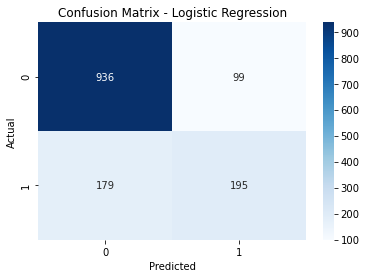


ROC CURVES COMPARISON


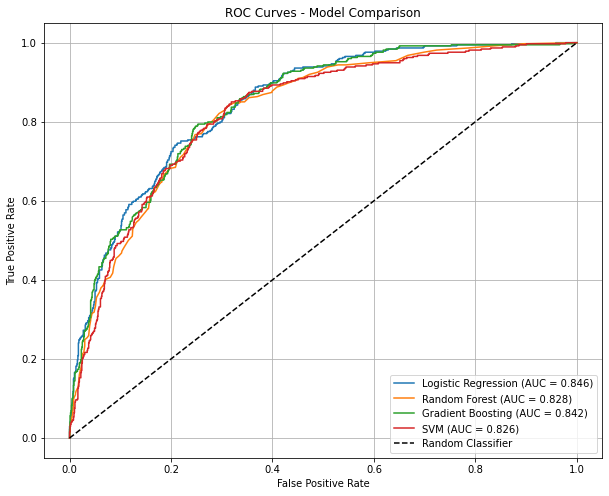


FEATURE IMPORTANCE ANALYSIS

BUSINESS IMPACT ANALYSIS
Business Impact of Deploying This Model:
  Churners Identified: 195/374 (52.1%)
  False Positives: 99
  Estimated Value Saved: $45,630
  Campaign Cost: $14,700
  Net Benefit: $30,930
  Roi: 210.4%
✅ Evaluation Phase Complete!


In [14]:
# =============================================================================
# PHASE 5: EVALUATION
# =============================================================================


# 5.1 Comprehensive Model Comparison
print("=" * 50)
print("COMPREHENSIVE MODEL EVALUATION")
print("=" * 50)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'ROC AUC': [results[model]['roc_auc'] for model in results]
}).sort_values('ROC AUC', ascending=False)

print("Model Performance Comparison:")
display(comparison_df)

# 5.2 Detailed Performance Analysis for Best Model
best_model_name = comparison_df.iloc[0]['Model']
best_model_results = results[best_model_name]

print(f"\n" + "=" * 50)
print(f"DETAILED ANALYSIS FOR BEST MODEL: {best_model_name}")
print("=" * 50)

y_pred_best = best_model_results['predictions']
y_proba_best = best_model_results['probabilities']

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 5.3 ROC Curve Comparison
print("\n" + "=" * 50)
print("ROC CURVES COMPARISON")
print("=" * 50)  # FIXED: Added parentheses

plt.figure(figsize=(10, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    auc_score = result['roc_auc']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 5.4 Feature Importance Analysis
print("\n" + "=" * 50)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

if hasattr(best_model_results['model'], 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model_results['model'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    display(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()

# 5.5 Business Impact Analysis
print("\n" + "=" * 50)
print("BUSINESS IMPACT ANALYSIS")
print("=" * 50)

# Calculate business metrics
def calculate_business_impact(y_true, y_pred, y_proba):
    """Calculate practical business metrics"""
    
    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Business assumptions
    avg_customer_value = 65 * 12  # $65/month * 12 months
    retention_campaign_cost = 50   # Cost to retain a customer
    
    # Business metrics
    total_churners = tp + fn
    identified_churners = tp
    false_positives = fp
    
    # If we target all predicted churners with retention campaigns
    retention_success_rate = 0.3  # 30% success rate in retention
    value_saved = identified_churners * retention_success_rate * avg_customer_value
    campaign_cost = (identified_churners + false_positives) * retention_campaign_cost
    net_benefit = value_saved - campaign_cost
    
    return {
        'churners_identified': f"{identified_churners}/{total_churners} ({identified_churners/total_churners:.1%})",
        'false_positives': false_positives,
        'estimated_value_saved': f"${value_saved:,.0f}",
        'campaign_cost': f"${campaign_cost:,.0f}",
        'net_benefit': f"${net_benefit:,.0f}",
        'roi': f"{(net_benefit/campaign_cost)*100:.1f}%" if campaign_cost > 0 else "N/A"
    }

business_impact = calculate_business_impact(y_test, y_pred_best, y_proba_best)
print("Business Impact of Deploying This Model:")
for metric, value in business_impact.items():
    print(f"  {metric.replace('_', ' ').title()}: {value}")

print("✅ Evaluation Phase Complete!")

### 📈 PHASE 5: EVALUATION

📈 PHASE 5: EVALUATION
COMPREHENSIVE MODEL EVALUATION
Model Performance Comparison:


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.802697,0.845883
2,Gradient Boosting,0.771469,0.842280
1,Random Forest,0.780696,0.827795
3,SVM,0.756565,0.825591



DETAILED ANALYSIS FOR BEST MODEL: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:


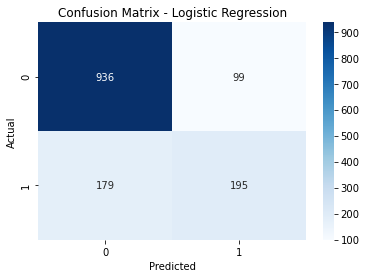


ROC CURVES COMPARISON


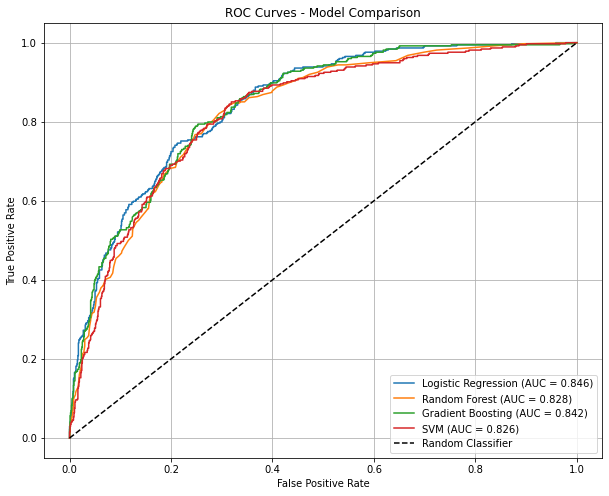


FEATURE IMPORTANCE ANALYSIS

BUSINESS IMPACT ANALYSIS
Business Impact of Deploying This Model:
  Churners Identified: 195/374 (52.1%)
  False Positives: 99
  Estimated Value Saved: $45,630
  Campaign Cost: $14,700
  Net Benefit: $30,930
  Roi: 210.4%
✅ Evaluation Phase Complete!


In [19]:
# =============================================================================
# PHASE 5: EVALUATION
# =============================================================================
print("📈 PHASE 5: EVALUATION")

# 5.1 Comprehensive Model Comparison
print("=" * 50)
print("COMPREHENSIVE MODEL EVALUATION")
print("=" * 50)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'ROC AUC': [results[model]['roc_auc'] for model in results]
}).sort_values('ROC AUC', ascending=False)

print("Model Performance Comparison:")
display(comparison_df)

# 5.2 Detailed Performance Analysis for Best Model
best_model_name = comparison_df.iloc[0]['Model']
best_model_results = results[best_model_name]

print(f"\n" + "=" * 50)
print(f"DETAILED ANALYSIS FOR BEST MODEL: {best_model_name}")
print("=" * 50)

y_pred_best = best_model_results['predictions']
y_proba_best = best_model_results['probabilities']

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 5.3 ROC Curve Comparison
print("\n" + "=" * 50)
print("ROC CURVES COMPARISON")
print("=" * 50)  # ✅ FIXED: Added parentheses

plt.figure(figsize=(10, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    auc_score = result['roc_auc']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 5.4 Feature Importance Analysis
print("\n" + "=" * 50)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

if hasattr(best_model_results['model'], 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model_results['model'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    display(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()

# 5.5 Business Impact Analysis
print("\n" + "=" * 50)
print("BUSINESS IMPACT ANALYSIS")
print("=" * 50)

# Calculate business metrics
def calculate_business_impact(y_true, y_pred, y_proba):
    """Calculate practical business metrics"""
    
    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Business assumptions
    avg_customer_value = 65 * 12  # $65/month * 12 months
    retention_campaign_cost = 50   # Cost to retain a customer
    
    # Business metrics
    total_churners = tp + fn
    identified_churners = tp
    false_positives = fp
    
    # If we target all predicted churners with retention campaigns
    retention_success_rate = 0.3  # 30% success rate in retention
    value_saved = identified_churners * retention_success_rate * avg_customer_value
    campaign_cost = (identified_churners + false_positives) * retention_campaign_cost
    net_benefit = value_saved - campaign_cost
    
    return {
        'churners_identified': f"{identified_churners}/{total_churners} ({identified_churners/total_churners:.1%})",
        'false_positives': false_positives,
        'estimated_value_saved': f"${value_saved:,.0f}",
        'campaign_cost': f"${campaign_cost:,.0f}",
        'net_benefit': f"${net_benefit:,.0f}",
        'roi': f"{(net_benefit/campaign_cost)*100:.1f}%" if campaign_cost > 0 else "N/A"
    }

business_impact = calculate_business_impact(y_test, y_pred_best, y_proba_best)
print("Business Impact of Deploying This Model:")
for metric, value in business_impact.items():
    print(f"  {metric.replace('_', ' ').title()}: {value}")

print("✅ Evaluation Phase Complete!")

### 🚀 PHASE 6: DEPLOYMENT PREPARATION

In [20]:
# =============================================================================
# PHASE 6: DEPLOYMENT PREPARATION
# =============================================================================
print("🚀 PHASE 6: DEPLOYMENT PREPARATION")

# 6.1 Save the Final Model and Preprocessing Objects
print("=" * 50)
print("MODEL SERIALIZATION")
print("=" * 50)

# Create deployment package
deployment_package = {
    'model': best_model_results['model'],
    'scaler': scaler,
    'feature_names': X.columns.tolist(),
    'model_performance': {
        'accuracy': best_model_results['accuracy'],
        'roc_auc': best_model_results['roc_auc']
    },
    'business_impact': business_impact,
    'version': '1.0.0',
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d')
}

# Save the deployment package
joblib.dump(deployment_package, 'telco_churn_model_v1.pkl')
print("✅ Model and preprocessing objects saved as 'telco_churn_model_v1.pkl'")

# 6.2 Create Prediction Function
print("\n" + "=" * 50)
print("PREDICTION FUNCTION")
print("=" * 50)

def predict_churn(customer_data, model_package_path='telco_churn_model_v1.pkl'):
    """
    Predict churn probability for a new customer
    
    Parameters:
    customer_data (dict): Dictionary containing customer features
    model_package_path (str): Path to saved model package
    
    Returns:
    dict: Prediction results
    """
    
    # Load model package
    package = joblib.load(model_package_path)
    model = package['model']
    scaler = package['scaler']
    feature_names = package['feature_names']
    
    # Create feature vector
    feature_vector = []
    for feature in feature_names:
        if feature in customer_data:
            feature_vector.append(customer_data[feature])
        else:
            feature_vector.append(0)  # Default value for missing features
    
    # Scale features
    feature_vector_scaled = scaler.transform([feature_vector])
    
    # Make prediction
    churn_probability = model.predict_proba(feature_vector_scaled)[0, 1]
    churn_prediction = model.predict(feature_vector_scaled)[0]
    
    # Interpretation
    risk_level = "High" if churn_probability > 0.7 else "Medium" if churn_probability > 0.3 else "Low"
    
    return {
        'churn_probability': round(churn_probability, 4),
        'churn_prediction': bool(churn_prediction),
        'risk_level': risk_level,
        'model_version': package['version']
    }

# Test the prediction function
print("Testing prediction function with sample data...")
sample_customer = {
    'tenure': 12,
    'MonthlyCharges': 70.50,
    'TotalCharges': 845.00,
    'Contract_One year': 1,
    'Contract_Two year': 0,
    'TotalServices': 3
}

prediction = predict_churn(sample_customer)
print("Sample Prediction Results:")
for key, value in prediction.items():
    print(f"  {key}: {value}")

# 6.3 Create Model Card
print("\n" + "=" * 50)
print("MODEL CARD")
print("=" * 50)

model_card = f"""
TELCO CUSTOMER CHURN PREDICTION MODEL
=====================================

Model Information:
- Algorithm: {best_model_name}
- Version: 1.0.0
- Training Date: {deployment_package['training_date']}

Performance Metrics:
- Accuracy: {best_model_results['accuracy']:.4f}
- ROC AUC: {best_model_results['roc_auc']:.4f}

Business Impact:
- Churners Identified: {business_impact['churners_identified']}
- Estimated Net Benefit: {business_impact['net_benefit']}
- ROI: {business_impact['roi']}

Intended Use:
- Identify customers at high risk of churning
- Enable proactive retention campaigns
- Support customer success initiatives

Limitations:
- Model trained on historical data up to {deployment_package['training_date']}
- Performance may vary with changing market conditions
- Regular retraining recommended every 3-6 months

Features Used: {len(X.columns)} features including tenure, monthly charges, contract type, and service usage patterns.
"""

print(model_card)

# 6.4 Final Recommendations
print("\n" + "=" * 50)
print("FINAL RECOMMENDATIONS")
print("=" * 50)

recommendations = """
RECOMMENDATIONS FOR DEPLOYMENT:

1. IMPLEMENTATION:
   - Integrate model with CRM system for real-time predictions
   - Set up automated alerts for high-risk customers
   - Train customer service team on using model outputs

2. MONITORING:
   - Track model performance monthly
   - Monitor for concept drift
   - Set up A/B testing for retention campaigns

3. MAINTENANCE:
   - Retrain model quarterly with new data
   - Update feature engineering as new data becomes available
   - Regularly review business impact metrics

4. ETHICAL CONSIDERATIONS:
   - Ensure fair treatment across customer segments
   - Maintain transparency about model usage
   - Provide opt-out mechanisms for customers
"""

print(recommendations)

print("🎉 PROJECT COMPLETE! All CRISP-DM phases executed successfully!")

🚀 PHASE 6: DEPLOYMENT PREPARATION
MODEL SERIALIZATION
✅ Model and preprocessing objects saved as 'telco_churn_model_v1.pkl'

PREDICTION FUNCTION
Testing prediction function with sample data...
Sample Prediction Results:
  churn_probability: 0.0259
  churn_prediction: False
  risk_level: Low
  model_version: 1.0.0

MODEL CARD

TELCO CUSTOMER CHURN PREDICTION MODEL

Model Information:
- Algorithm: Logistic Regression
- Version: 1.0.0
- Training Date: 2025-11-10

Performance Metrics:
- Accuracy: 0.8027
- ROC AUC: 0.8459

Business Impact:
- Churners Identified: 195/374 (52.1%)
- Estimated Net Benefit: $30,930
- ROI: 210.4%

Intended Use:
- Identify customers at high risk of churning
- Enable proactive retention campaigns
- Support customer success initiatives

Limitations:
- Model trained on historical data up to 2025-11-10
- Performance may vary with changing market conditions
- Regular retraining recommended every 3-6 months

Features Used: 31 features including tenure, monthly charges, 